In [ ]:
!pip install torch torchvision





In [ ]:
!pip install detecto


In [ ]:
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
custom_transforms = transforms.Compose([
transforms.ToPILImage(),
transforms.Resize(900),
transforms.RandomHorizontalFlip(0.5),
transforms.ColorJitter(saturation=0.2),
transforms.ToTensor(),
utils.normalize_transform(),
])

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RCigVJcS5AHx8HVcgdtR")
project = rf.workspace("majal-mqvgx").project("person-detection-phirl")
dataset = project.version(23).download("voc")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existing

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to person-detection-23 in voc:: 100%|██████████| 9501/9501 [00:01<00:00, 7432.74it/s]


In [ ]:
!unzip test.zip -d "/content/Test"

Archive:  test.zip
  inflating: /content/Test/DSC_0068.jpg  
  inflating: /content/Test/DSC_0068.xml  
  inflating: /content/Test/DSC_0081.jpg  
  inflating: /content/Test/DSC_0081.xml  
  inflating: /content/Test/DSC_0082.jpg  
  inflating: /content/Test/DSC_0082.xml  
  inflating: /content/Test/DSC_0107.jpg  
  inflating: /content/Test/DSC_0107.xml  
  inflating: /content/Test/DSC_0108.jpg  
  inflating: /content/Test/DSC_0108.xml  
  inflating: /content/Test/DSC_0123.jpg  
  inflating: /content/Test/DSC_0123.xml  
  inflating: /content/Test/DSC_0124.jpg  
  inflating: /content/Test/DSC_0124.xml  


In [ ]:
!unzip train.zip -d "/content/Train"

Archive:  train.zip
  inflating: /content/Train/DSC_0126.jpg  
  inflating: /content/Train/DSC_0126.xml  
  inflating: /content/Train/DSC_0130.jpg  
  inflating: /content/Train/DSC_0130.xml  
  inflating: /content/Train/DSC_0131.jpg  
  inflating: /content/Train/DSC_0131.xml  
  inflating: /content/Train/DSC_0152.jpg  
  inflating: /content/Train/DSC_0152.xml  
  inflating: /content/Train/DSC_0229.jpg  
  inflating: /content/Train/DSC_0229.xml  
  inflating: /content/Train/DSC_0231.jpg  
  inflating: /content/Train/DSC_0231.xml  
  inflating: /content/Train/DSC_0232.jpg  
  inflating: /content/Train/DSC_0232.xml  
  inflating: /content/Train/DSC_0243.jpg  
  inflating: /content/Train/DSC_0243.xml  
  inflating: /content/Train/DSC_0244.jpg  
  inflating: /content/Train/DSC_0244.xml  
  inflating: /content/Train/DSC_0257.jpg  
  inflating: /content/Train/DSC_0257.xml  
  inflating: /content/Train/DSC_0258.jpg  
  inflating: /content/Train/DSC_0258.xml  
  inflating: /content/Train/DSC_02

In [ ]:
Train_dataset=core.Dataset("/content/person-detection-23/train",transform=custom_transforms)#L1
Test_dataset = core.Dataset("/content/person-detection-23/test")#L2
loader=core.DataLoader(Train_dataset, batch_size=8, shuffle=True)#L3
model = core.Model(['person'])#L4
losses = model.fit(loader, Test_dataset, epochs=25, lr_step_size=5, learning_rate=0.001, verbose=True)#L5

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 156MB/s]


Epoch 1 of 25
Begin iterating over training dataset


100%|██████████| 538/538 [14:36<00:00,  1.63s/it]


Begin iterating over validation dataset


100%|██████████| 144/144 [00:14<00:00,  9.66it/s]


Loss: 0.07572500751767722
Epoch 2 of 25
Begin iterating over training dataset


100%|██████████| 538/538 [14:34<00:00,  1.62s/it]


Begin iterating over validation dataset


100%|██████████| 144/144 [00:14<00:00,  9.77it/s]


Loss: 0.07589485086241944
Epoch 3 of 25
Begin iterating over training dataset


100%|██████████| 538/538 [14:34<00:00,  1.63s/it]


Begin iterating over validation dataset


100%|██████████| 144/144 [00:14<00:00,  9.74it/s]


Loss: 0.0633268985289356
Epoch 4 of 25
Begin iterating over training dataset


 83%|████████▎ | 448/538 [12:08<02:26,  1.62s/it]

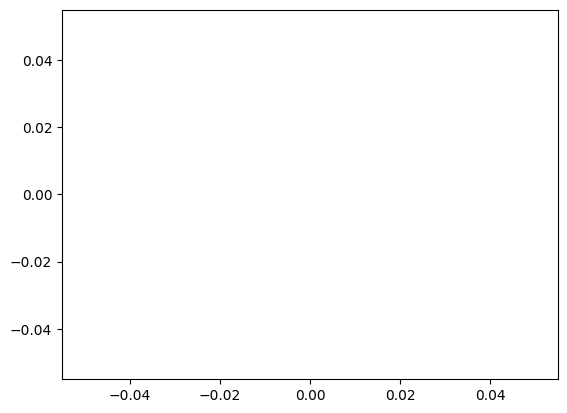

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
model.save('model_weights.pth')
model = core.Model.load('model_weights.pth', ['person'])

In [ ]:
!unzip totest.zip -d "/content/totest"

Archive:  totest.zip
  inflating: /content/totest/DSC_0344.jpg  
  inflating: /content/totest/DSC_0371.jpg  
  inflating: /content/totest/DSC_0372.jpg  
  inflating: /content/totest/DSC_0389.jpg  
  inflating: /content/totest/DSC_0390.jpg  
  inflating: /content/totest/DSC_0406.jpg  
  inflating: /content/totest/DSC_0407.jpg  
  inflating: /content/totest/DSC_0463.jpg  
  inflating: /content/totest/DSC_0488.jpg  
  inflating: /content/totest/DSC_0502.jpg  
  inflating: /content/totest/DSC_0587.jpg  
  inflating: /content/totest/DSC_0613.jpg  


In [ ]:
# import required module
from PIL import Image
import os
import cv2
# assign directory
directory = "/content/totest"

# iterate over files in
# that directory
i = 0
for filename in os.listdir(directory):
  f = os.path.join(directory, filename)
	# checking if it is a file
	#if os.path.isfile(f):
  image = utils.read_image(f)
  predictions = model.predict(image)
  #print(predictions)
  labels, boxes, scores = predictions
  #print(boxes)
  #show_labeled_image(image, boxes, labels)
  thresh=0.45
  filtered_indices=np.where(scores>thresh)
  filtered_scores=scores[filtered_indices]
  filtered_boxes=boxes[filtered_indices]
  x = filtered_boxes.tolist()
  #print(x)
  print(x[0])
  num_list = filtered_indices[0].tolist()
  filtered_labels = [labels[i] for i in num_list]
  #show_labeled_image(image, filtered_boxes, filtered_labels)
  img = Image.open(f)
  print(x[0][0])
  area = (x[0][0], x[0][1], x[0][2], x[0][3])
  cropped_img = img.crop(area)
  cropped_img
  cropped_img.save("/content/results/result_img{}.jpg".format(i))
  i = i+1



[3199.4697265625, 2282.541015625, 3254.006591796875, 2373.00048828125]
3199.4697265625
[2940.1767578125, 1100.4022216796875, 3004.228271484375, 1168.1766357421875]
2940.1767578125
[3266.42431640625, 1501.6527099609375, 3325.889892578125, 1587.6845703125]
3266.42431640625
[2039.8807373046875, 1189.4310302734375, 2091.9873046875, 1239.9912109375]
2039.8807373046875
[2696.5478515625, 447.818603515625, 2760.756103515625, 532.52392578125]
2696.5478515625
[3172.546630859375, 31.623233795166016, 3237.916748046875, 117.66998291015625]
3172.546630859375
[996.4432983398438, 1080.8153076171875, 1075.0865478515625, 1147.8690185546875]
996.4432983398438
[1494.117431640625, 617.9387817382812, 1548.351318359375, 708.9420776367188]
1494.117431640625
[2939.590576171875, 2121.514404296875, 2989.1240234375, 2209.796875]
2939.590576171875
[3101.808349609375, 990.9204711914062, 3172.7158203125, 1042.1898193359375]
3101.808349609375
[2692.336669921875, 757.8732299804688, 2746.111328125, 845.5805053710938]
2

([], tensor([], size=(0, 4)), tensor([]))
tensor([], size=(0, 4))


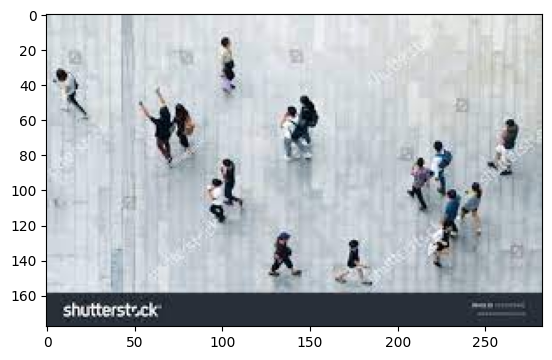

In [ ]:
image = utils.read_image('/content/download.jpeg')
predictions = model.predict(image)
print(predictions)
labels, boxes, scores = predictions
print(boxes)
show_labeled_image(image, boxes, labels)

[[995.7771606445312, 1078.9071044921875, 1077.821044921875, 1146.6346435546875]]
[995.7771606445312, 1078.9071044921875, 1077.821044921875, 1146.6346435546875]


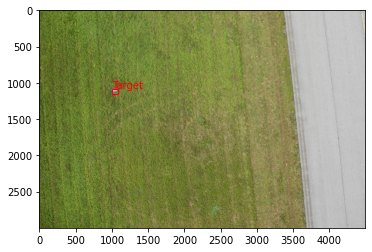

In [ ]:
thresh=0.45
filtered_indices=np.where(scores>thresh)
filtered_scores=scores[filtered_indices]
filtered_boxes=boxes[filtered_indices]
x = filtered_boxes.tolist()
print(x)
print(x[0])
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
show_labeled_image(image, filtered_boxes, filtered_labels)

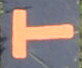

In [ ]:
#from PIL import Image

# Given information
#img = Image.open("/content/DSC_0587.jpg")
#width, height = 440, 190
#x, y = 100, 20

# Select area to crop
#area = (x[0][0], x[0][1], x[0][2], x[0][3])

# Crop, show, and save image
#cropped_img = img.crop(area)
#cropped_img
#cropped_img.save("cropped_image.jpg")